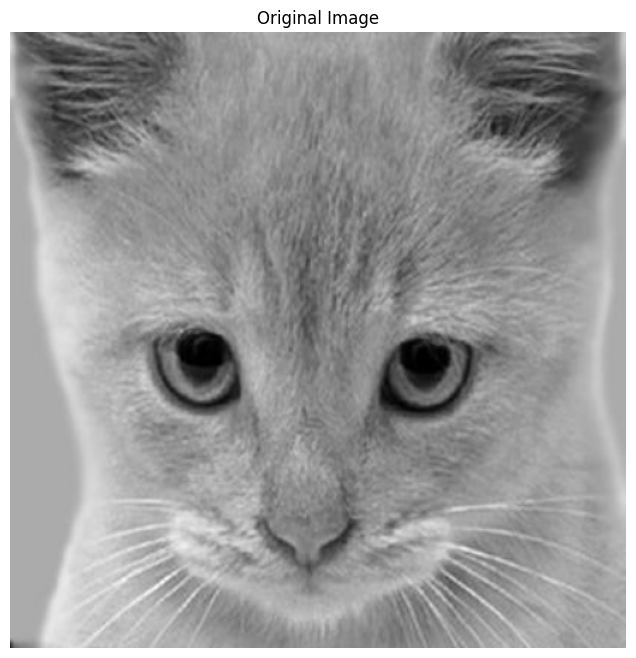

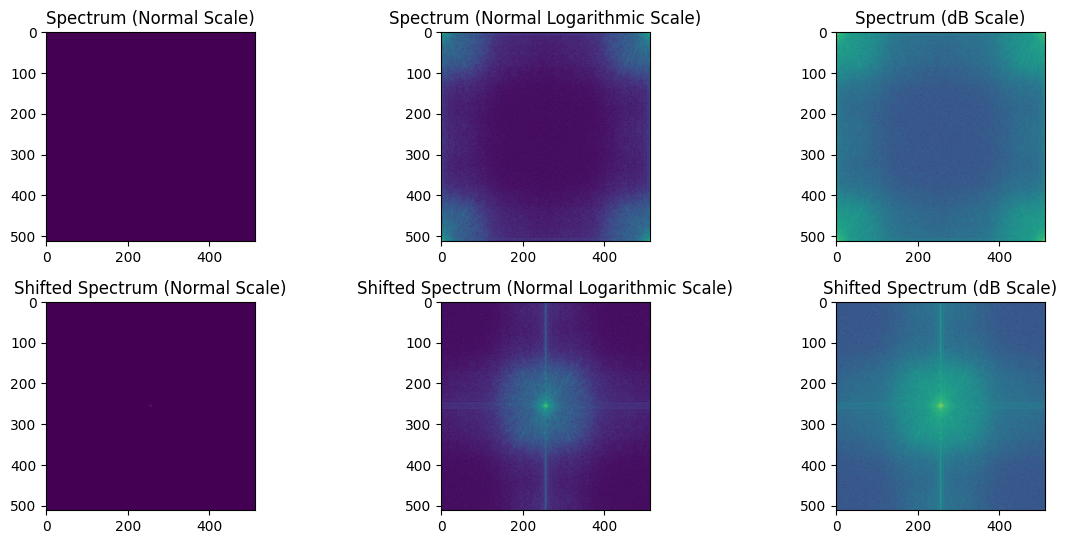

DC in unshifted spectrum: (np.int64(0), np.int64(0))
DC in shifted spectrum: (np.int64(256), np.int64(256))


In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_fft_spectrum(image):
    # 2D FFT
    fft = np.fft.fft2(image)
    fft_shifted = np.fft.fftshift(fft)

    # Magnitude spectra
    mag_normal = np.abs(fft)
    mag_db = 20 * np.log10(np.abs(fft) + 1e-5)

    # Shifted spectra (low-frequency at center)
    mag_normal_shifted = np.abs(fft_shifted)
    mag_db_shifted = 20 * np.log10(np.abs(fft_shifted) + 1e-5)  # To avoid (log(0))

    return mag_normal, mag_db, mag_normal_shifted, mag_db_shifted

def display_spectra( mag, mag_db, mag_shift, mag_db_shift):
    plt.figure(figsize=(12, 8))

    plt.subplot(331), plt.imshow(mag, cmap='viridis')
    plt.title("Spectrum (Normal Scale)")
    plt.axis('on')

    # Since, the magnitude spectrum is entirely dark, we improve its visibility by using logarithmic scale
    plt.subplot(332), plt.imshow(np.log1p(mag), cmap='viridis')
    plt.title("Spectrum (Normal Logarithmic Scale)")
    plt.axis('on')

    plt.subplot(333), plt.imshow(mag_db, cmap='viridis')
    plt.title("Spectrum (dB Scale)")
    plt.axis('on')

    plt.subplot(334), plt.imshow(mag_shift, cmap='viridis')
    plt.title("Shifted Spectrum (Normal Scale)")
    plt.axis('on')

    # Since, the magnitude spectrum is entirely dark, we improve its visibility by using logarithmic scale
    plt.subplot(335), plt.imshow(np.log1p(mag_shift), cmap='viridis')
    plt.title("Shifted Spectrum (Normal Logarithmic Scale)")
    plt.axis('on')

    plt.subplot(336), plt.imshow(mag_db_shift, cmap='viridis')
    plt.title("Shifted Spectrum (dB Scale)")
    plt.axis('on')

    plt.tight_layout()
    plt.show()

# Loading grayscale image, resizing and normalising it
image = cv2.imread(r'D:\EE200_practical_programming\EE200_practical_programming\cat_gray.jpg',cv2.IMREAD_GRAYSCALE)    # can also try for dog's image
image = cv2.resize(image, (512, 512))
image = image.astype(np.float32) / 255.0

# Displaying the original image
plt.figure(figsize=(12, 8))
plt.plot(231), plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# Computing all the spectas
mag, mag_db, mag_shift, mag_db_shift = compute_fft_spectrum(image)

# Displaying the spectrum plots
display_spectra( mag, mag_db, mag_shift, mag_db_shift)

# Finding the centre of the spectrum plot
max_unshifted = np.unravel_index(np.argmax(mag), mag.shape)
max_shifted = np.unravel_index(np.argmax(mag_shift), mag_shift.shape)

print("DC in unshifted spectrum:", max_unshifted)
print("DC in shifted spectrum:", max_shifted)

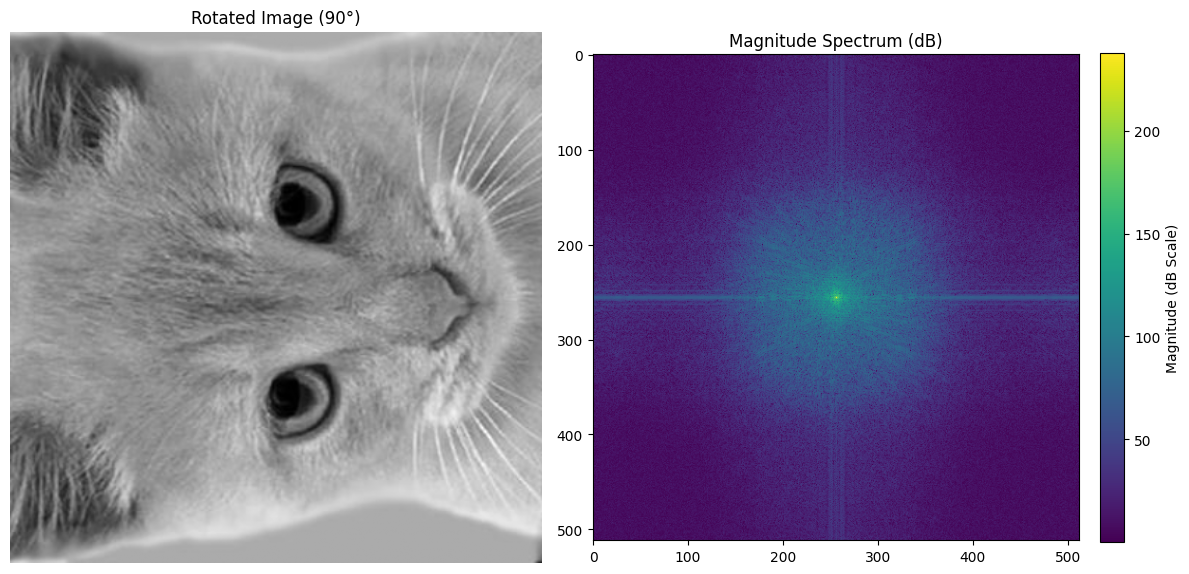

In [48]:
# Rotating image by 90 degrees anti-clockwise
img_rotated = np.rot90(image)

# Computing FFT of rotated image
f_rot = np.fft.fft2(img_rotated)
f_rot_shifted = np.fft.fftshift(f_rot)
magnitude_rot = 20 * np.log(np.abs(f_rot_shifted) + 1)

# Plotting rotated image and spectrum with colorbars to display the intensity levels
plt.figure(figsize=(12, 6))

plt.subplot(121)
im1 = plt.imshow(img_rotated, cmap='gray')   
plt.title('Rotated Image (90°)')
plt.axis('off')

plt.subplot(122)
im2 = plt.imshow(magnitude_rot, cmap='viridis')
plt.title('Magnitude Spectrum (dB)')
plt.axis('on')
plt.colorbar(im2, fraction=0.046, pad=0.04, label='Magnitude (dB Scale)')

plt.tight_layout()
plt.show()


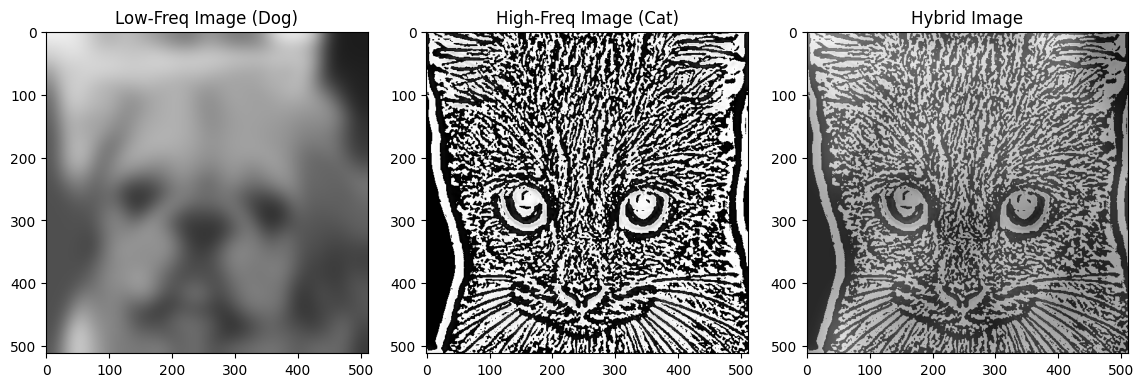

In [49]:
def hybrid_image(img1, img2, sigma_low=15, sigma_high=5):   #chose these values of sigma after experimentation
    # Low-pass filter: smooth image 2
    low_img2 = cv2.GaussianBlur(img2, (0, 0), sigma_low)

    # High-pass filter: detect sharp edges from image 1
    low_img1 = cv2.GaussianBlur(img1, (0, 0), sigma_high)
    high_img1 = img1 - low_img1

    # Fusion of the filtered images
    hybrid = cv2.addWeighted(low_img2, 0.5, high_img1, 0.5, 0)

    return hybrid, low_img2, high_img1

# Loading images (resize to same shape)
img1 = cv2.imread(r'D:\EE200_practical_programming\EE200_practical_programming\cat_gray.jpg')
img2 = cv2.imread(r'D:\EE200_practical_programming\EE200_practical_programming\dog_gray.jpg')
img1 = cv2.resize(img1, (512, 512))
img2 = cv2.resize(img2, (512, 512))

hybrid, low_f, high_f = hybrid_image(img1, img2)

# Ploting hybrid image
plt.figure(figsize=(15, 5))
plt.subplot(142), plt.imshow(low_f, cmap='gray'), plt.title('Low-Freq Image (Dog)')
plt.subplot(143), plt.imshow(high_f, cmap='gray'), plt.title('High-Freq Image (Cat)')
plt.subplot(144), plt.imshow(hybrid, cmap='gray'), plt.title('Hybrid Image')
plt.tight_layout()
plt.show()

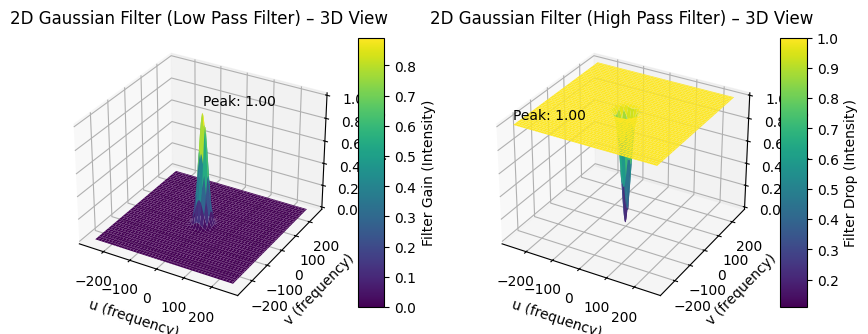

In [50]:
from mpl_toolkits.mplot3d import Axes3D

def plot_filter(size=512, sigma=15):
    u = np.arange(-size//2, size//2)
    v = np.arange(-size//2, size//2)
    U, V = np.meshgrid(u, v)
    D = np.sqrt(U**2 + V**2)

    low_pass_filter = np.exp(-(D**2) / (2 * sigma**2))
    high_pass_filter = 1 - low_pass_filter
    
    fig = plt.figure(figsize=(10, 7))
    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122, projection='3d')

    # Surface plot
    surf_low = ax1.plot_surface(U, V, low_pass_filter, cmap='viridis', edgecolor='none')
    surf_high = ax2.plot_surface(U, V, high_pass_filter, cmap='viridis', edgecolor='none')

    # Axis Labels
    ax1.set_title('2D Gaussian Filter (Low Pass Filter) – 3D View')
    ax1.set_xlabel('u (frequency)')
    ax1.set_ylabel('v (frequency)')
    ax1.set_zlabel('Amplitude')

    ax2.set_title('2D Gaussian Filter (High Pass Filter) – 3D View')
    ax2.set_xlabel('u (frequency)')
    ax2.set_ylabel('v (frequency)')
    ax2.set_zlabel('Amplitude')
 
    # Add Colorbar for intensity
    cbar = fig.colorbar(surf_low, ax=ax1, shrink=0.5, aspect=10)
    cbar.set_label('Filter Gain (Intensity)')

    cbar = fig.colorbar(surf_high, ax=ax2, shrink=0.5, aspect=10)
    cbar.set_label('Filter Drop (Intensity)')

    # Optional: Annotate peak
    peak_value = low_pass_filter.max()
    peak_loc = np.unravel_index(np.argmax(low_pass_filter), low_pass_filter.shape)
    ax1.text(U[peak_loc], V[peak_loc], low_pass_filter[peak_loc] + 0.05,
        f"Peak: {peak_value:.2f}", color='black', fontsize=10)
    
    # Optional: Annotate peak
    peak_value = high_pass_filter.max()
    peak_loc = np.unravel_index(np.argmax(high_pass_filter), high_pass_filter.shape)
    ax2.text(U[peak_loc], V[peak_loc], high_pass_filter[peak_loc] + 0.05,
        f"Peak: {peak_value:.2f}", color='black', fontsize=10)

    plt.show()

plot_filter()